# 주가

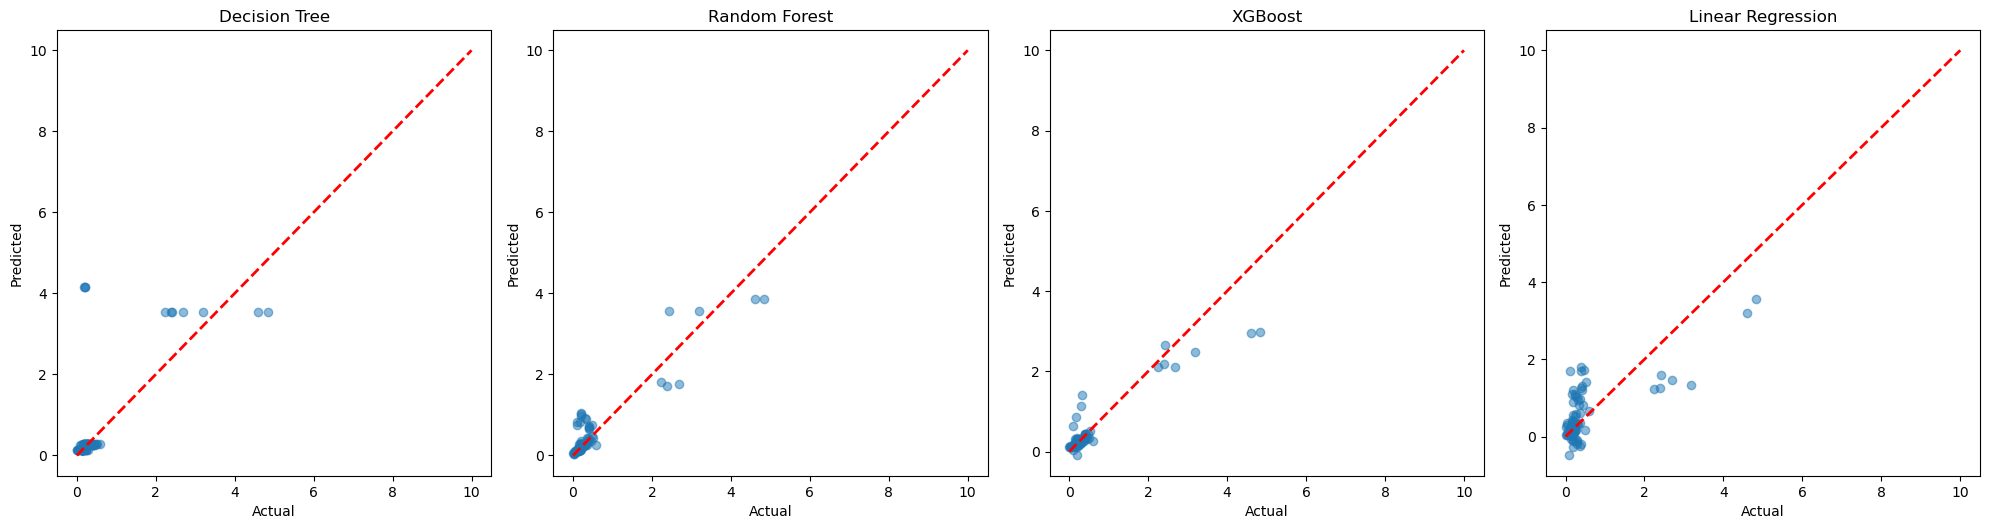

Decision Tree - MSE Train: 0.5963, MSE Test: 0.6954, RMSE Train: 0.7722, RMSE Test: 0.8339, R2 Train: 0.5935, R2 Test: 0.1352, CV RMSE: 0.6812, F1 Train: 0.7500, F1 Test: 0.7368
Random Forest - MSE Train: 0.3349, MSE Test: 0.1153, RMSE Train: 0.5787, RMSE Test: 0.3395, R2 Train: 0.7717, R2 Test: 0.8566, CV RMSE: 0.7848, F1 Train: 0.5556, F1 Test: 0.4828
XGBoost - MSE Train: 0.0333, MSE Test: 0.1275, RMSE Train: 0.1824, RMSE Test: 0.3571, R2 Train: 0.9773, R2 Test: 0.8414, CV RMSE: 0.3875, F1 Train: 0.7347, F1 Test: 0.7619
Linear Regression - MSE Train: 0.3545, MSE Test: 0.3861, RMSE Train: 0.5954, RMSE Test: 0.6214, R2 Train: 0.7584, R2 Test: 0.5199, CV RMSE: 0.7262, F1 Train: 0.4468, F1 Test: 0.4615


In [28]:
#모델링 - 주가
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = './final.csv'
data = pd.read_csv(file_path)

# 전처리
scaler = MinMaxScaler(feature_range=(0,10)) ## 각 칼럼 데이터 값을 0~3 범위로 변환
le = LabelEncoder()
data["Name"] = le.fit_transform(data["Name"])
data["Year"] = le.fit_transform(data["Year"])
data["Quarter"] = le.fit_transform(data["Quarter"])
target_minmax=data.iloc[:,3:]
scaler.fit(target_minmax) ## 각 칼럼 데이터마다 변환할 함수 생성
transformed_X = scaler.transform(target_minmax) ## fit에서 만들어진 함수를 실제로 데이터에 적용
after_mimax=pd.DataFrame(transformed_X, columns=[data.columns[3:]])
for i in list(after_mimax.columns):
    col_name=str(i).split("'")[1]
    if col_name == "Interest_Rate":
        continue
    data[col_name] = after_mimax[col_name]



# Feature matrix X and target vector y
X = data.drop(columns=['Stock_Price'])
y = data['Stock_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train
X_test_scaled = X_test

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold=0.5):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Discretize the continuous target variable using a threshold
    y_train_binary = (y_train > threshold).astype(int)
    y_test_binary = (y_test > threshold).astype(int)
    y_train_pred_binary = (y_train_pred > threshold).astype(int)
    y_test_pred_binary = (y_test_pred > threshold).astype(int)
    
    f1_train = f1_score(y_train_binary, y_train_pred_binary)
    f1_test = f1_score(y_test_binary, y_test_pred_binary)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    return y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test, cv_rmse, f1_train, f1_test


# Decision Tree with reduced complexity
dt_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=42)
results_dt = evaluate_model(dt_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_dt, y_test_pred_dt, mse_train_dt, mse_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt, cv_rmse_dt, f1_train_dt, f1_test_dt = results_dt

# Random Forest with reduced complexity
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42)
results_rf = evaluate_model(rf_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_rf, y_test_pred_rf, mse_train_rf, mse_test_rf, rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf, cv_rmse_rf, f1_train_rf, f1_test_rf = results_rf

# XGBoost with reduced complexity
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
results_xgb = evaluate_model(xgb_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_xgb, y_test_pred_xgb, mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb, r2_train_xgb, r2_test_xgb, cv_rmse_xgb, f1_train_xgb, f1_test_xgb = results_xgb

# Linear Regression
lr_regressor = LinearRegression()
results_lr = evaluate_model(lr_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_lr, y_test_pred_lr, mse_train_lr, mse_test_lr, rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr, cv_rmse_lr, f1_train_lr, f1_test_lr = results_lr

# Plotting
plt.figure(figsize=(20, 10))

# Decision Tree Plot
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_test_pred_dt, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Random Forest Plot
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# XGBoost Plot
plt.subplot(2, 4, 3)
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

# Linear Regression Plot
plt.subplot(2, 4, 4)
plt.scatter(y_test, y_test_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.tight_layout()
plt.show()

# Print the results
print("Decision Tree - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_dt, mse_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt, cv_rmse_dt, f1_train_dt, f1_test_dt))
print("Random Forest - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_rf, mse_test_rf, rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf, cv_rmse_rf, f1_train_rf, f1_test_rf))
print("XGBoost - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb, r2_train_xgb, r2_test_xgb, cv_rmse_xgb, f1_train_xgb, f1_test_xgb))
print("Linear Regression - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_lr, mse_test_lr, rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr, cv_rmse_lr, f1_train_lr, f1_test_lr))


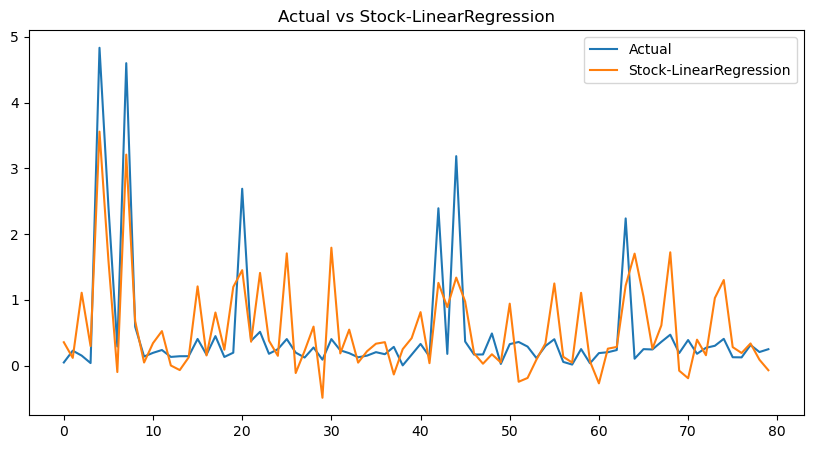

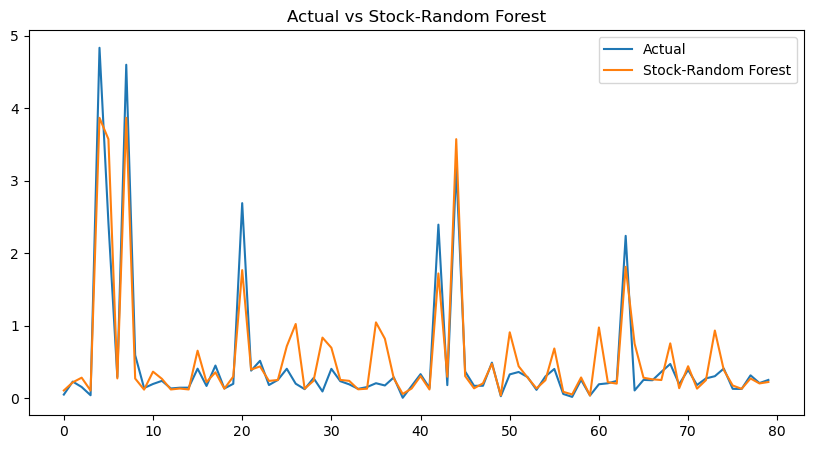

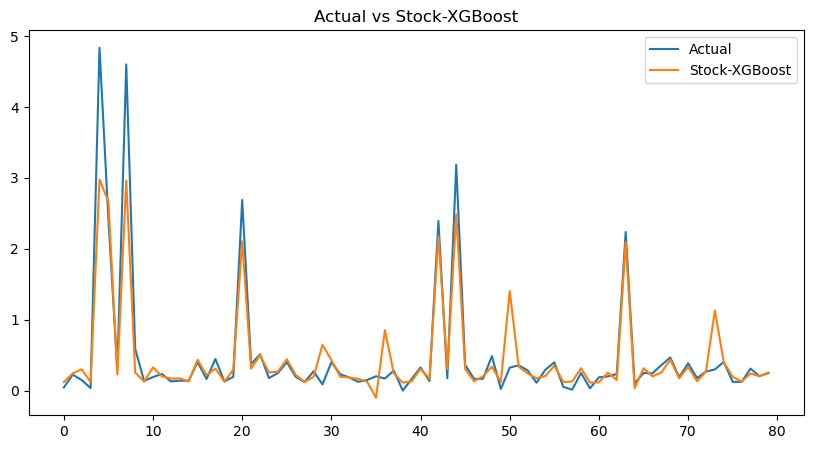

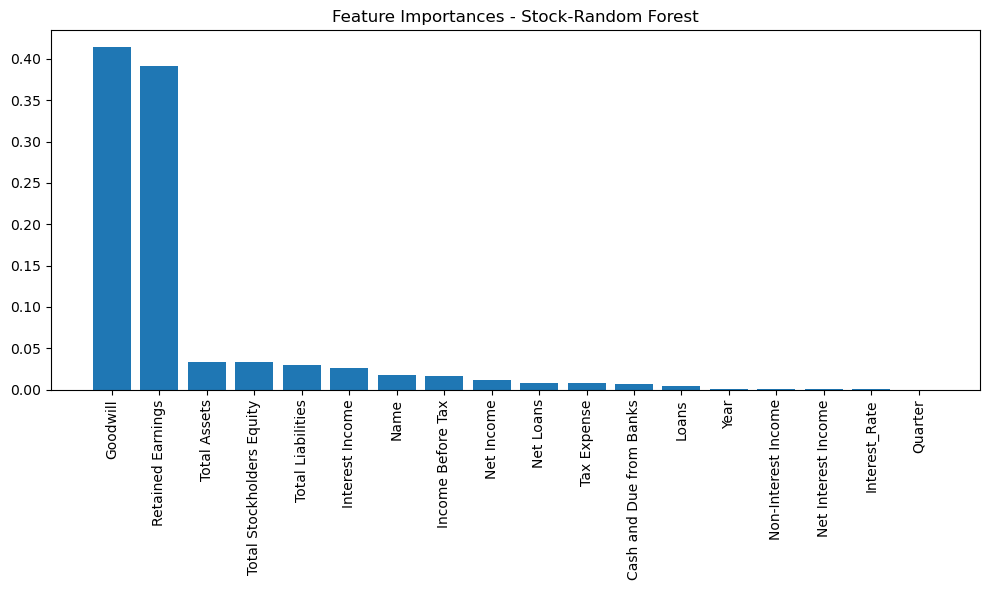

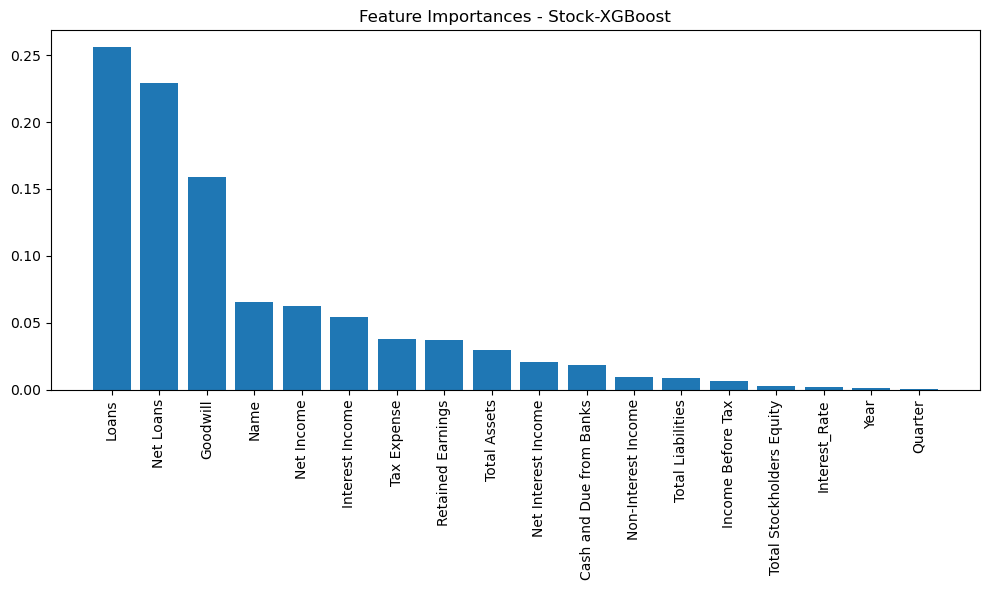

In [25]:
# 시각화-주가
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# (기존 코드는 그대로 유지)

# 추가 시각화를 위한 함수
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title(f'Residual Plot - {title}')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

def plot_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances - {title}")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# 모델 평가 및 기존 시각화 (기존 코드 유지)
# import matplotlib.pyplot as plt

# 실제 값과 선형 회귀 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_lr, label='Stock-LinearRegression')
plt.legend()
plt.title('Actual vs Stock-LinearRegression')
plt.show()

# 실제 값과 1D CNN 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_rf, label='Stock-Random Forest')
plt.legend()
plt.title('Actual vs Stock-Random Forest')
plt.show()

# 실제 값과 1D CNN 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_xgb, label='Stock-XGBoost')
plt.legend()
plt.title('Actual vs Stock-XGBoost')
plt.show()


# 추가 시각화

# plot_feature_importance(dt_regressor, X, "Stock-Decision Tree")
plot_feature_importance(rf_regressor, X, "Stock-Random Forest")
plot_feature_importance(xgb_regressor, X, "Stock-XGBoost")
# plot_feature_importance(lr_regressor, X, "LinearRegression")

# 상관관계 히트맵
# plt.figure(figsize=(12, 10))
# sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Heatmap')
# plt.show()

# 금리

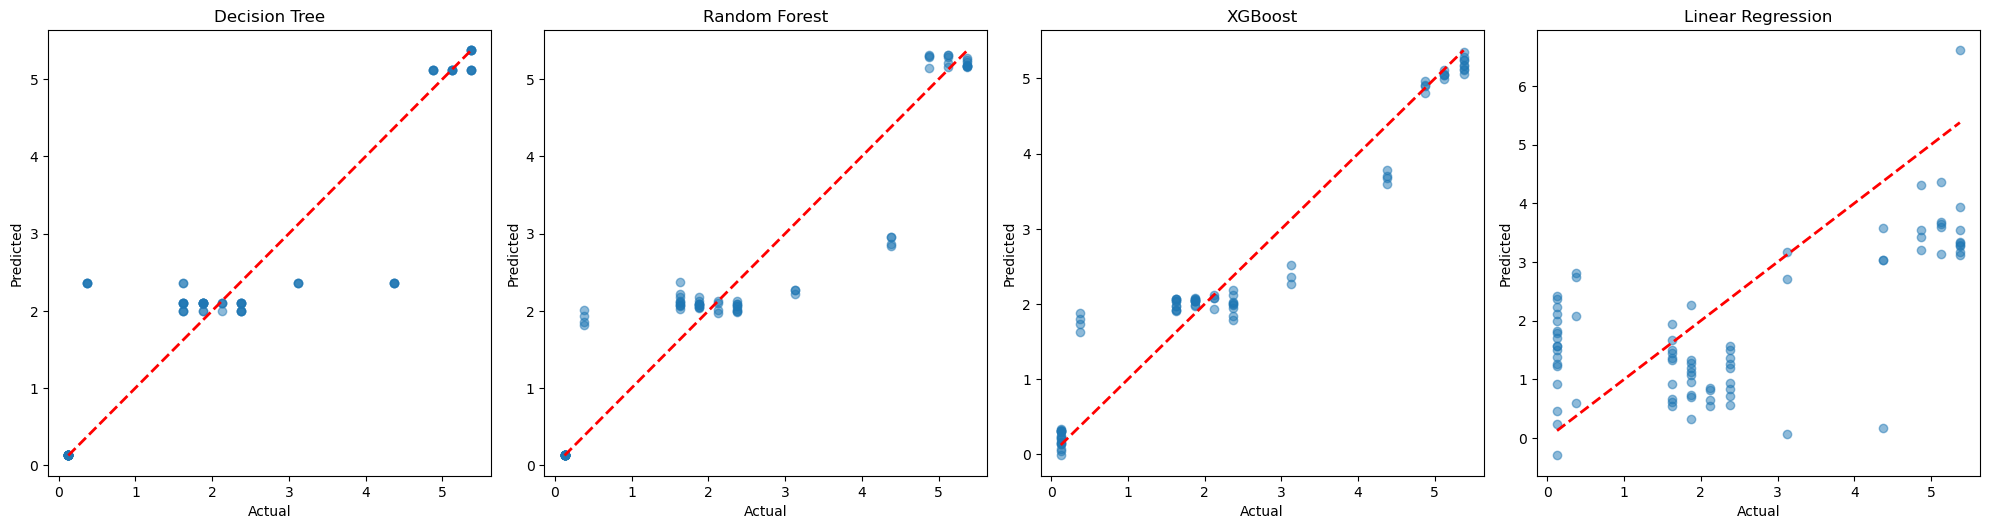

Decision Tree - MSE Train: 0.3800, MSE Test: 0.4790, RMSE Train: 0.6164, RMSE Test: 0.6921, R2 Train: 0.8955, R2 Test: 0.8617, CV RMSE: 0.5977, F1 Train: 0.9706, F1 Test: 0.9667
Random Forest - MSE Train: 0.2354, MSE Test: 0.3185, RMSE Train: 0.4851, RMSE Test: 0.5644, R2 Train: 0.9353, R2 Test: 0.9080, CV RMSE: 0.6550, F1 Train: 0.9706, F1 Test: 0.9667
XGBoost - MSE Train: 0.1146, MSE Test: 0.1904, RMSE Train: 0.3386, RMSE Test: 0.4363, R2 Train: 0.9685, R2 Test: 0.9450, CV RMSE: 0.4345, F1 Train: 0.9706, F1 Test: 0.9667
Linear Regression - MSE Train: 2.0482, MSE Test: 2.1956, RMSE Train: 1.4312, RMSE Test: 1.4818, R2 Train: 0.4368, R2 Test: 0.3659, CV RMSE: 1.8070, F1 Train: 0.7600, F1 Test: 0.8333


In [26]:
#모델링 - 금리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

# Load the CSV file
file_path = './final.csv'
data = pd.read_csv(file_path)

# 전처리
scaler = MinMaxScaler(feature_range=(0,10)) ## 각 칼럼 데이터 값을 0~3 범위로 변환
le = LabelEncoder()
data["Name"] = le.fit_transform(data["Name"])
data["Year"] = le.fit_transform(data["Year"])
data["Quarter"] = le.fit_transform(data["Quarter"])
target_minmax=data.iloc[:,3:]
scaler.fit(target_minmax) ## 각 칼럼 데이터마다 변환할 함수 생성
transformed_X = scaler.transform(target_minmax) ## fit에서 만들어진 함수를 실제로 데이터에 적용
after_mimax=pd.DataFrame(transformed_X, columns=[data.columns[3:]])
for i in list(after_mimax.columns):
    col_name=str(i).split("'")[1]
    if col_name == "Interest_Rate":
        continue
    data[col_name] = after_mimax[col_name]



# Feature matrix X and target vector y
X = data.drop(columns=['Interest_Rate'])
y = data['Interest_Rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = X_train
X_test_scaled = X_test

# Function to evaluate the model
def evaluate_model(model, X_train, X_test, y_train, y_test, threshold=0.5):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Discretize the continuous target variable using a threshold
    y_train_binary = (y_train > threshold).astype(int)
    y_test_binary = (y_test > threshold).astype(int)
    y_train_pred_binary = (y_train_pred > threshold).astype(int)
    y_test_pred_binary = (y_test_pred > threshold).astype(int)
    
    f1_train = f1_score(y_train_binary, y_train_pred_binary)
    f1_test = f1_score(y_test_binary, y_test_pred_binary)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    return y_train_pred, y_test_pred, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test, cv_rmse, f1_train, f1_test


# Decision Tree with reduced complexity
dt_regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=42)
results_dt = evaluate_model(dt_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_dt, y_test_pred_dt, mse_train_dt, mse_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt, cv_rmse_dt, f1_train_dt, f1_test_dt = results_dt

# Random Forest with reduced complexity
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42)
results_rf = evaluate_model(rf_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_rf, y_test_pred_rf, mse_train_rf, mse_test_rf, rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf, cv_rmse_rf, f1_train_rf, f1_test_rf = results_rf

# XGBoost with reduced complexity
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, min_child_weight=5, subsample=0.8, colsample_bytree=0.8, random_state=42)
results_xgb = evaluate_model(xgb_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_xgb, y_test_pred_xgb, mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb, r2_train_xgb, r2_test_xgb, cv_rmse_xgb, f1_train_xgb, f1_test_xgb = results_xgb

# Linear Regression
lr_regressor = LinearRegression()
results_lr = evaluate_model(lr_regressor, X_train_scaled, X_test_scaled, y_train, y_test)
y_train_pred_lr, y_test_pred_lr, mse_train_lr, mse_test_lr, rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr, cv_rmse_lr, f1_train_lr, f1_test_lr = results_lr

# Plotting
plt.figure(figsize=(20, 10))

# Decision Tree Plot
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_test_pred_dt, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree')

# Random Forest Plot
plt.subplot(2, 4, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest')

# XGBoost Plot
plt.subplot(2, 4, 3)
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('XGBoost')

# Linear Regression Plot
plt.subplot(2, 4, 4)
plt.scatter(y_test, y_test_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

plt.tight_layout()
plt.show()

# Print the results
print("Decision Tree - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_dt, mse_test_dt, rmse_train_dt, rmse_test_dt, r2_train_dt, r2_test_dt, cv_rmse_dt, f1_train_dt, f1_test_dt))
print("Random Forest - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_rf, mse_test_rf, rmse_train_rf, rmse_test_rf, r2_train_rf, r2_test_rf, cv_rmse_rf, f1_train_rf, f1_test_rf))
print("XGBoost - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_xgb, mse_test_xgb, rmse_train_xgb, rmse_test_xgb, r2_train_xgb, r2_test_xgb, cv_rmse_xgb, f1_train_xgb, f1_test_xgb))
print("Linear Regression - MSE Train: {:.4f}, MSE Test: {:.4f}, RMSE Train: {:.4f}, RMSE Test: {:.4f}, R2 Train: {:.4f}, R2 Test: {:.4f}, CV RMSE: {:.4f}, F1 Train: {:.4f}, F1 Test: {:.4f}".format(mse_train_lr, mse_test_lr, rmse_train_lr, rmse_test_lr, r2_train_lr, r2_test_lr, cv_rmse_lr, f1_train_lr, f1_test_lr))


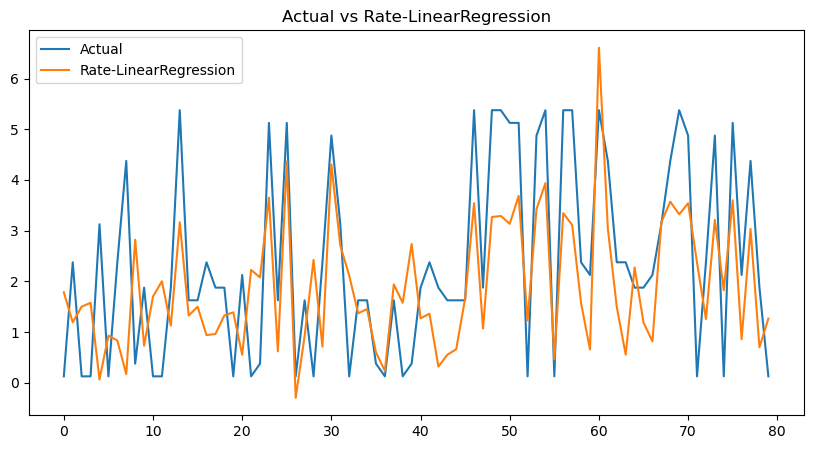

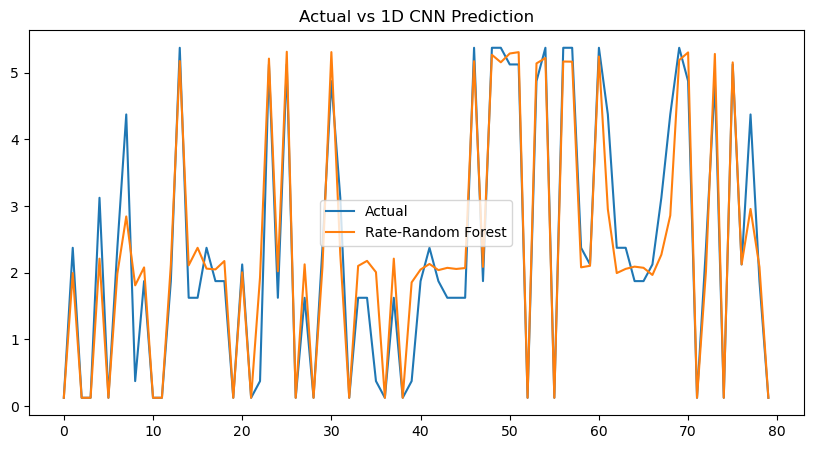

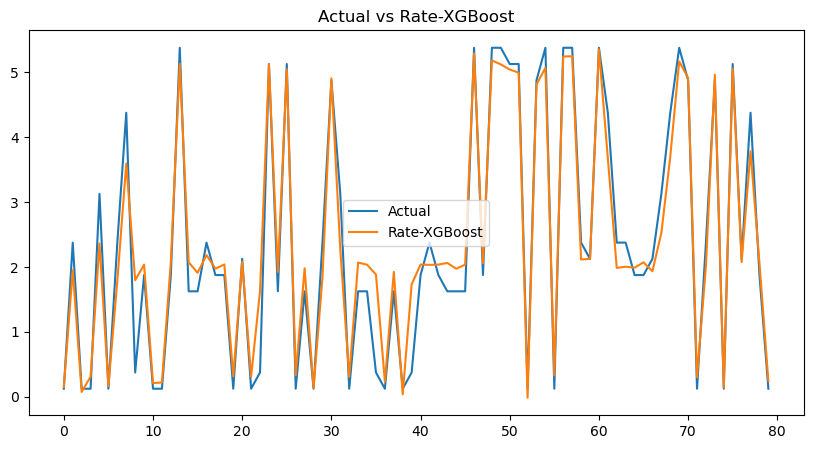

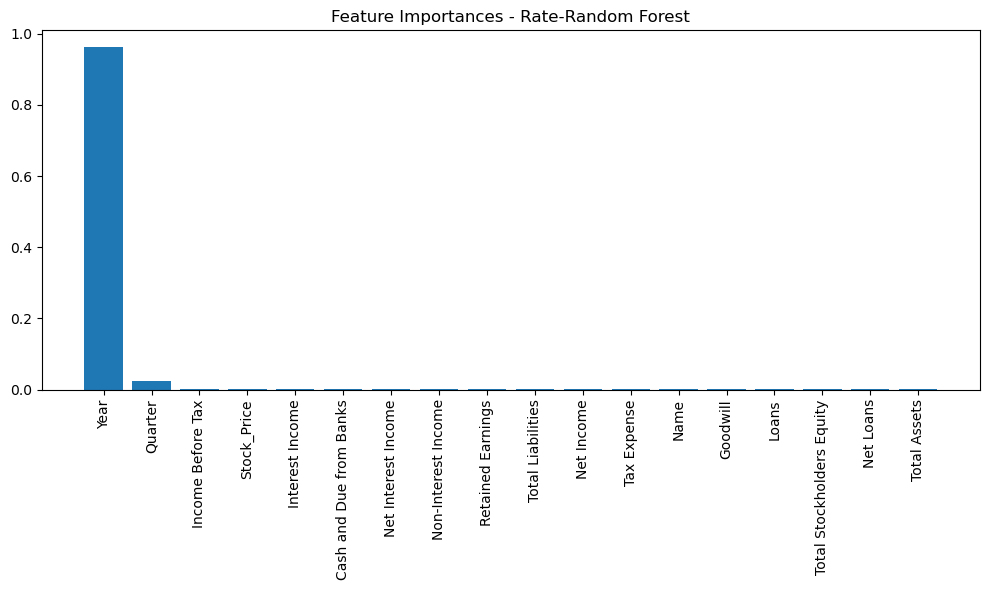

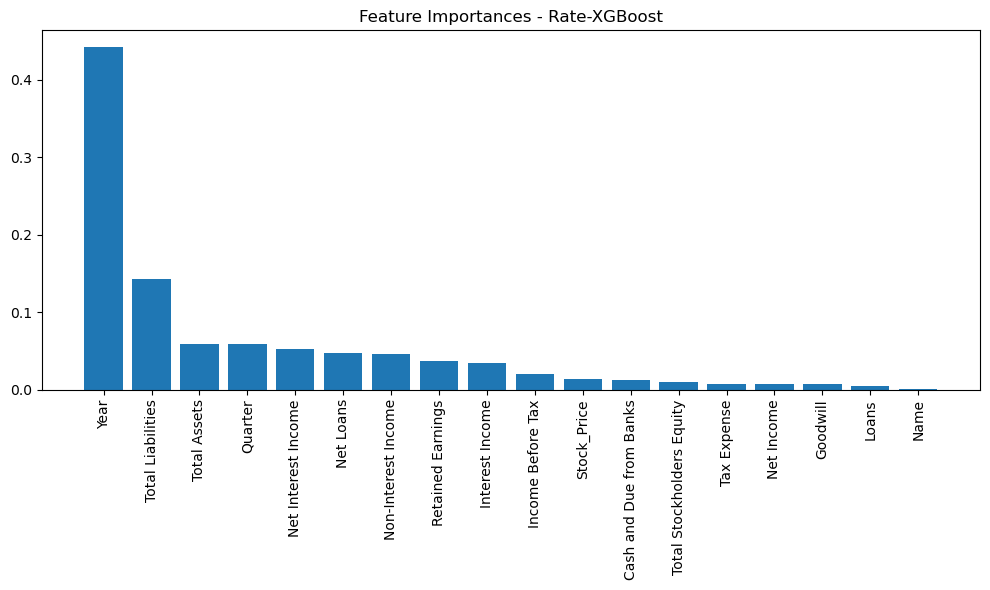

In [27]:
# 시각화-금리
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# (기존 코드는 그대로 유지)

# 추가 시각화를 위한 함수
def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 5))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.title(f'Residual Plot - {title}')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.axhline(y=0, color='r', linestyle='--')
    plt.show()

def plot_feature_importance(model, X, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_names = X.columns

    plt.figure(figsize=(10, 6))
    plt.title(f"Feature Importances - {title}")
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

# 모델 평가 및 기존 시각화 (기존 코드 유지)

# 추가 시각화

# 실제 값과 선형 회귀 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_lr, label='Rate-LinearRegression')
plt.legend()
plt.title('Actual vs Rate-LinearRegression')
plt.show()

# 실제 값과 1D CNN 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_rf, label='Rate-Random Forest')
plt.legend()
plt.title('Actual vs 1D CNN Prediction')
plt.show()

# 실제 값과 1D CNN 예측 값 비교
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_test_pred_xgb, label='Rate-XGBoost')
plt.legend()
plt.title('Actual vs Rate-XGBoost')
plt.show()
# plot_feature_importance(dt_regressor, X, "Rate-Decision Tree")
plot_feature_importance(rf_regressor, X, "Rate-Random Forest")
plot_feature_importance(xgb_regressor, X, "Rate-XGBoost")

# 상관관계 히트맵
# plt.figure(figsize=(12, 10))
# sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Feature Correlation Heatmap')
# plt.show()